In [2]:
#API Call of Global Warming CO2
import requests
import json
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

In [11]:
# Make API Call and Get JSON Data
url = 'https://global-warming.org/api/co2-api'

co2_response = requests.get(url)

print(co2_response.json())

{'co2': [{'year': '2013', 'month': '2', 'day': '6', 'cycle': '396.08', 'trend': '394.55'}, {'year': '2013', 'month': '2', 'day': '7', 'cycle': '396.10', 'trend': '394.55'}, {'year': '2013', 'month': '2', 'day': '8', 'cycle': '396.12', 'trend': '394.56'}, {'year': '2013', 'month': '2', 'day': '9', 'cycle': '396.14', 'trend': '394.57'}, {'year': '2013', 'month': '2', 'day': '10', 'cycle': '396.16', 'trend': '394.58'}, {'year': '2013', 'month': '2', 'day': '11', 'cycle': '396.18', 'trend': '394.58'}, {'year': '2013', 'month': '2', 'day': '12', 'cycle': '396.20', 'trend': '394.59'}, {'year': '2013', 'month': '2', 'day': '13', 'cycle': '396.22', 'trend': '394.60'}, {'year': '2013', 'month': '2', 'day': '14', 'cycle': '396.24', 'trend': '394.61'}, {'year': '2013', 'month': '2', 'day': '15', 'cycle': '396.25', 'trend': '394.61'}, {'year': '2013', 'month': '2', 'day': '16', 'cycle': '396.27', 'trend': '394.62'}, {'year': '2013', 'month': '2', 'day': '17', 'cycle': '396.28', 'trend': '394.63'},

In [12]:
if co2_response.status_code == 200:
    data = co2_response.json()
else:
    print("Failed to fetch data from the API.")
    exit()

In [13]:
# Save JSON to a File
with open('data.json', 'w') as json_file:
    json.dump(data, json_file)

In [14]:
# Read JSON Data
with open('data.json', 'r') as json_file:
    data = json.load(json_file)

In [15]:
data

{'co2': [{'year': '2013',
   'month': '2',
   'day': '6',
   'cycle': '396.08',
   'trend': '394.55'},
  {'year': '2013',
   'month': '2',
   'day': '7',
   'cycle': '396.10',
   'trend': '394.55'},
  {'year': '2013',
   'month': '2',
   'day': '8',
   'cycle': '396.12',
   'trend': '394.56'},
  {'year': '2013',
   'month': '2',
   'day': '9',
   'cycle': '396.14',
   'trend': '394.57'},
  {'year': '2013',
   'month': '2',
   'day': '10',
   'cycle': '396.16',
   'trend': '394.58'},
  {'year': '2013',
   'month': '2',
   'day': '11',
   'cycle': '396.18',
   'trend': '394.58'},
  {'year': '2013',
   'month': '2',
   'day': '12',
   'cycle': '396.20',
   'trend': '394.59'},
  {'year': '2013',
   'month': '2',
   'day': '13',
   'cycle': '396.22',
   'trend': '394.60'},
  {'year': '2013',
   'month': '2',
   'day': '14',
   'cycle': '396.24',
   'trend': '394.61'},
  {'year': '2013',
   'month': '2',
   'day': '15',
   'cycle': '396.25',
   'trend': '394.61'},
  {'year': '2013',
   'mont

In [26]:
# Convert JSON to CSV
csv_data = []
for item in data['co2']:
    csv_data.append([item['year'], item['month'], item['day'], item['cycle'], item['trend']])
    #print (item)

In [27]:
# Write CSV to "resources" Folder
# Define the CSV file
csv_file_path = os.path.join('../../Resources/co2_data.csv')

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['year', 'month', 'day', 'cycle', 'trend'])
    csv_writer.writerows(csv_data)

print(f'CSV file saved to: {csv_file_path}')

CSV file saved to: ../../Resources/co2_data.csv


In [7]:
# Open and Read CSV File
co2_data_csv_file_path = '../../resources/co2_data.csv'

co2_data_frame = pd.read_csv(co2_data_csv_file_path)
co2_data_frame

,year,month,day,cycle,trend
0,2013,2,6,396.08,394.55
1,2013,2,7,396.10,394.55
2,2013,2,8,396.12,394.56
3,2013,2,9,396.14,394.57
4,2013,2,10,396.16,394.58
...,...,...,...,...,...
3843,2023,8,16,415.79,419.53
3844,2023,8,17,415.73,419.54
3845,2023,8,18,415.68,419.54
3846,2023,8,19,415.63,419.55


In [42]:
# Group data by year and perform aggregation (e.g., calculate mean)
co2_grouped_by_year = co2_data_frame.groupby('year').mean()

# Display the grouped data
print(co2_grouped_by_year)

         month        day       cycle       trend
year                                             
2013  7.115502  15.887538  395.570061  395.673131
2014  6.526027  15.720548  397.563534  397.609753
2015  6.526027  15.720548  399.797041  399.784548
2016  6.513661  15.756831  403.012951  403.016503
2017  6.526027  15.720548  405.490329  405.492959
2018  6.526027  15.720548  407.728959  407.711918
2019  6.526027  15.720548  410.283781  410.294658
2020  6.513661  15.756831  412.790437  412.750765
2021  6.526027  15.720548  414.974000  415.038849
2022  6.526027  15.720548  417.250712  417.206658
2023  4.362069  15.215517  419.585259  418.824009


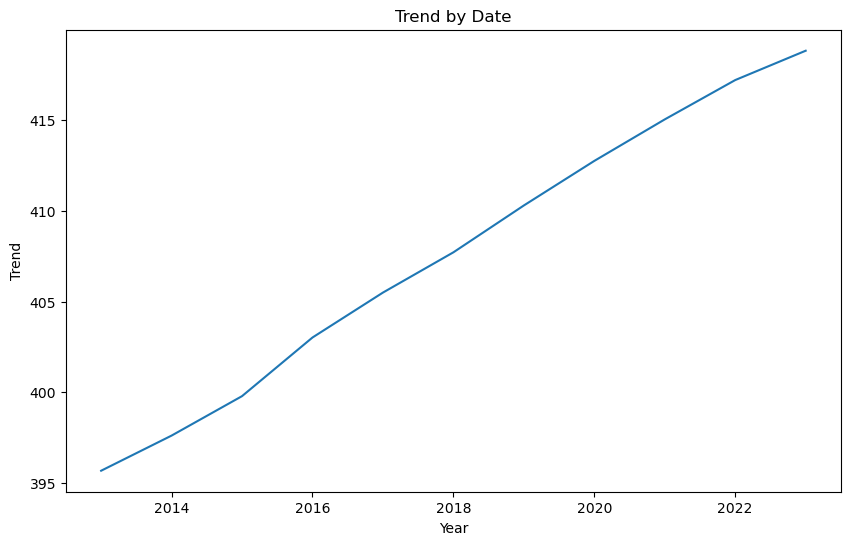

In [74]:
# Plotting the trend by date
co2_grouped_by_year['trend'].plot(figsize=(10, 6))
plt.title('Trend by Date')
plt.xlabel('Year')
plt.ylabel('Trend')
plot_file_path = 'co2byyear_plot.png'
plt.savefig(plot_file_path)
plt.show()

In [60]:
# Select specific columns
selected_columns = co2_data_frame[['month','trend']]

print(selected_columns)

      month   trend
year               
2013      2  394.55
2013      2  394.55
2013      2  394.56
2013      2  394.57
2013      2  394.58
...     ...     ...
2023      8  419.53
2023      8  419.54
2023      8  419.54
2023      8  419.55
2023      8  419.56

[3848 rows x 2 columns]


In [66]:
# Select data from a specific year (e.g., 2020)
data_from_year_reset_index = selected_columns.reset_index()

print(data_from_year_reset_index)

      year  month   trend
0     2013      2  394.55
1     2013      2  394.55
2     2013      2  394.56
3     2013      2  394.57
4     2013      2  394.58
...    ...    ...     ...
3843  2023      8  419.53
3844  2023      8  419.54
3845  2023      8  419.54
3846  2023      8  419.55
3847  2023      8  419.56

[3848 rows x 3 columns]


In [69]:
year_to_select = 2020
data_from_year_2020 = data_from_year_reset_index[data_from_year_reset_index['year'] == year_to_select]

print(data_from_year_2020)

      year  month   trend
2520  2020      1  411.63
2521  2020      1  411.64
2522  2020      1  411.64
2523  2020      1  411.65
2524  2020      1  411.66
...    ...    ...     ...
2881  2020     12  413.79
2882  2020     12  413.80
2883  2020     12  413.81
2884  2020     12  413.81
2885  2020     12  413.82

[366 rows x 3 columns]


In [71]:
co22020bymonth = data_from_year_2020.groupby('month').mean()

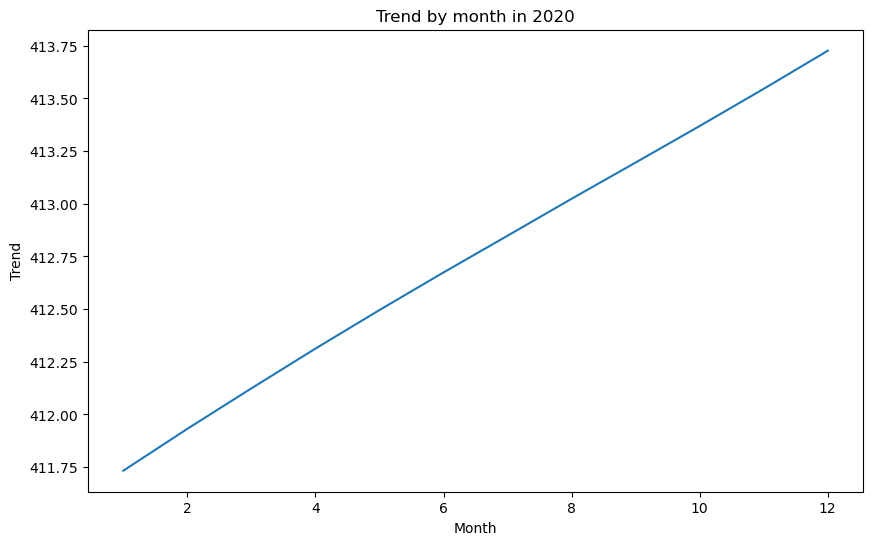

In [73]:
# Plotting the trend by month in 2020
co22020bymonth['trend'].plot(figsize=(10, 6))
plt.title('Trend by month in 2020')
plt.xlabel('Month')
plt.ylabel('Trend')
plot_file_path = 'co2_2020_month_plot.png'
plt.savefig(plot_file_path)
plt.show()

In [8]:
# Convert the year, month, and day columns into a single datetime column:

co2_data_frame['date']= pd.to_datetime(co2_data_frame[['year', 'month', 'day']])

In [9]:
# Set the newly created datetime column as the index of your DataFrame:
co2_data_frame.set_index('date', inplace=True)

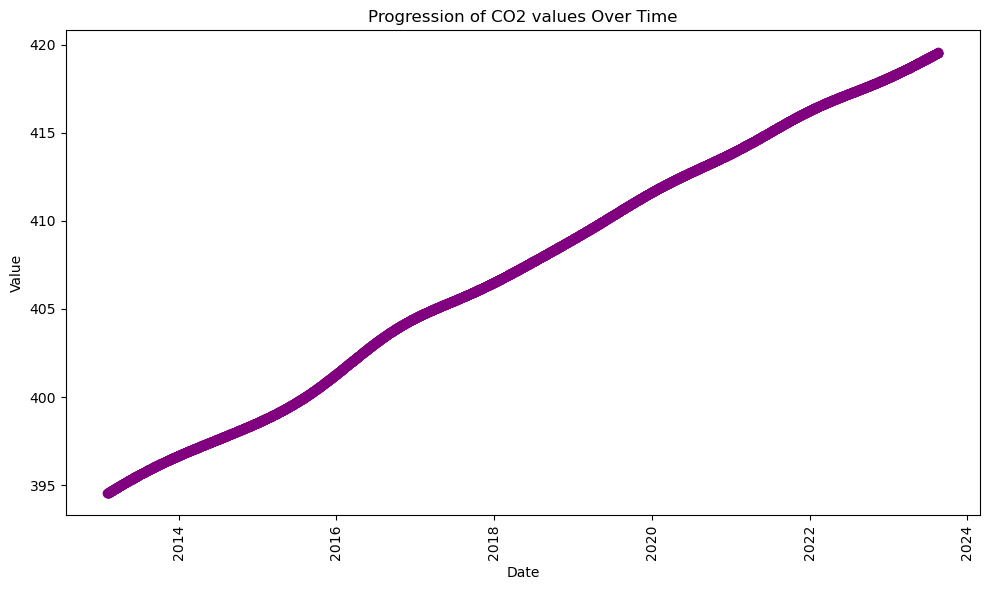

In [37]:
# Plot the desired value over time using Matplotlib:

# Create a custom formatted date string for y-axis labels
co2_data_frame['formatted_date'] = co2_data_frame.index.strftime('%Y-%m-%d')

plt.figure(figsize=(10, 6))
plt.plot(co2_data_frame.index, co2_data_frame['trend'], marker='o', linestyle='-', color='purple', linewidth=2)
plt.title('Progression of CO2 values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)
#plt.xticks(co2_data_frame.index, co2_data_frame['formatted_date'])
#plt.yticks(co2_data_frame['trend'])
plt.grid(False)
plt.tight_layout()
plot_file_path = 'co2_dprogressionnotgrouped_plot.png'
plt.savefig(plot_file_path)
plt.show()